# Problem Statement


A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


## Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

### Importing the libraries 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings 
warnings.filterwarnings("ignore") 

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm 

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

### Reading the dataset

In [3]:
df = pd.read_csv('C:/Users/Admin/Documents/DATA SCIENCE/Upgrad/Regression/assignment/day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Analysing the data 

In [4]:
df.shape

(730, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


There are no null values in any of the columns 

In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

### Dropping columns 

In [8]:
df = df.drop(['atemp','dteday','instant'],axis = 1)

In [9]:
df = df.drop(['casual','registered'],axis = 1)

In [10]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600



### Preparing the data

#### Mapping all categorical variables 

Season, mnth, weekday, weathersit are all in some ordered. All of them are converted from ordered categorical variables to strings

In [11]:
cat = ['season','mnth','weekday','weathersit'] ## all categorical variables are put in a list
df[cat] = df[cat].astype(str)

df['season'] = df['season'].replace(['1','2','3','4'],['Spring','Summer','Fall','Winter']) 

In [12]:
df['weathersit'] = df['weathersit'].replace(['1','2','3','4'],
                                ['Clear','Mist','Light Snow','Heavy rain'])

In [13]:
df['mnth'] = df['mnth'].replace(['1','2','3','4','5','6','7','8','9','10','11','12'],
                                ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

In [14]:
df['weekday'] = df['weekday'].replace(['0','1','2','3','4','5','6'],
                                ['Sun','Mon','Tue','Wed','Thur','Fri','Sat'])

### EDA 


### Count Vs different parameters 

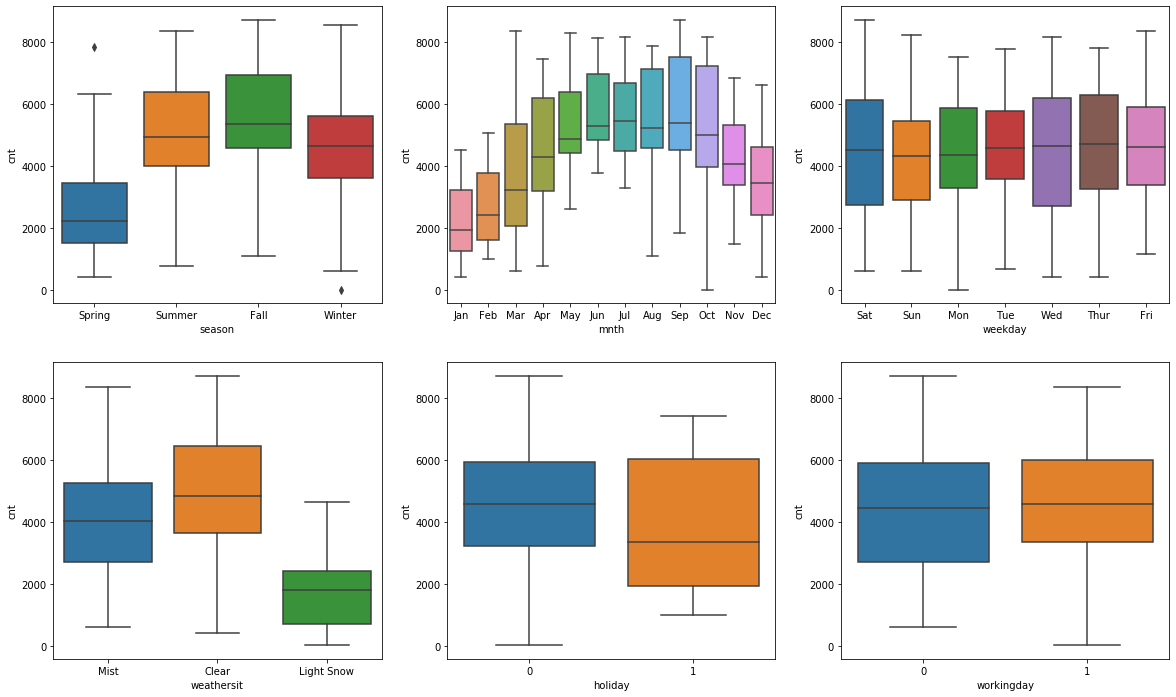

In [15]:


plt.figure(figsize = (20,12))
plt.subplot(2,3,1)
sns.boxplot(data = df, x = 'season', y = 'cnt')
plt.subplot(2,3,2)
sns.boxplot(data = df, x = 'mnth', y = 'cnt')
plt.subplot(2,3,3)
sns.boxplot(data = df, x = 'weekday', y = 'cnt')
plt.subplot(2,3,4)
sns.boxplot(data = df, x = 'weathersit', y = 'cnt')
plt.subplot(2,3,5)
sns.boxplot(data = df, x = 'holiday', y = 'cnt')
plt.subplot(2,3,6)
sns.boxplot(data = df, x = 'workingday', y = 'cnt')

   * Fall has the highest count.
   * In months, June, July, August, September have the highest count. 
   * All weekdays seem to have the same count. 
   * On clear days, there is the highest count of rentals 
   * On holidays, the count of rentals drop. 
   * Working days seem to have no effect on rental count

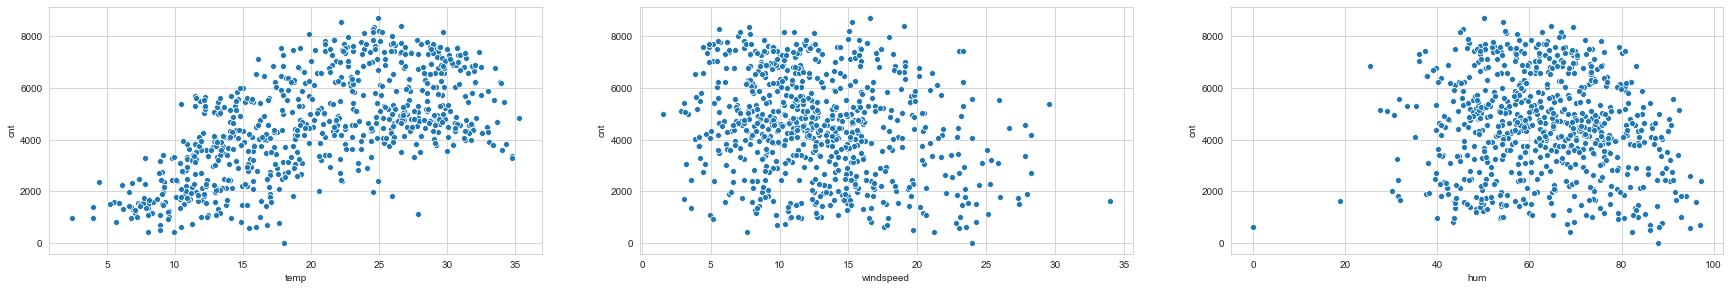

In [16]:

plt.figure(figsize = (30,10))
sns.set_style('whitegrid')
plt.subplot(2,3,1)
sns.scatterplot(data = df, x = 'temp', y = 'cnt')
plt.subplot(2,3,2)
sns.scatterplot(data = df, x = 'windspeed', y = 'cnt')
plt.subplot(2,3,3)
sns.scatterplot(data = df, x = 'hum', y = 'cnt')

All three numerical variables have outliers. 

- Temperature less than 5.
- windspeed above 30.
- Humidity less than 20. 


### Checking for Correlation

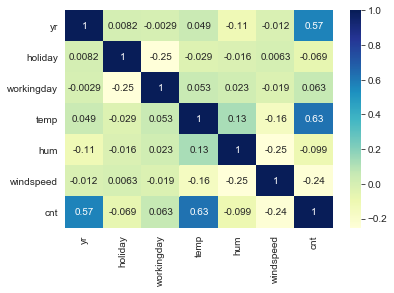

In [17]:
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu')

Holiday, working day, humidity - three parameters affect the rental count least. 

While Temperature, year and windspeed affect the rental count highly. 

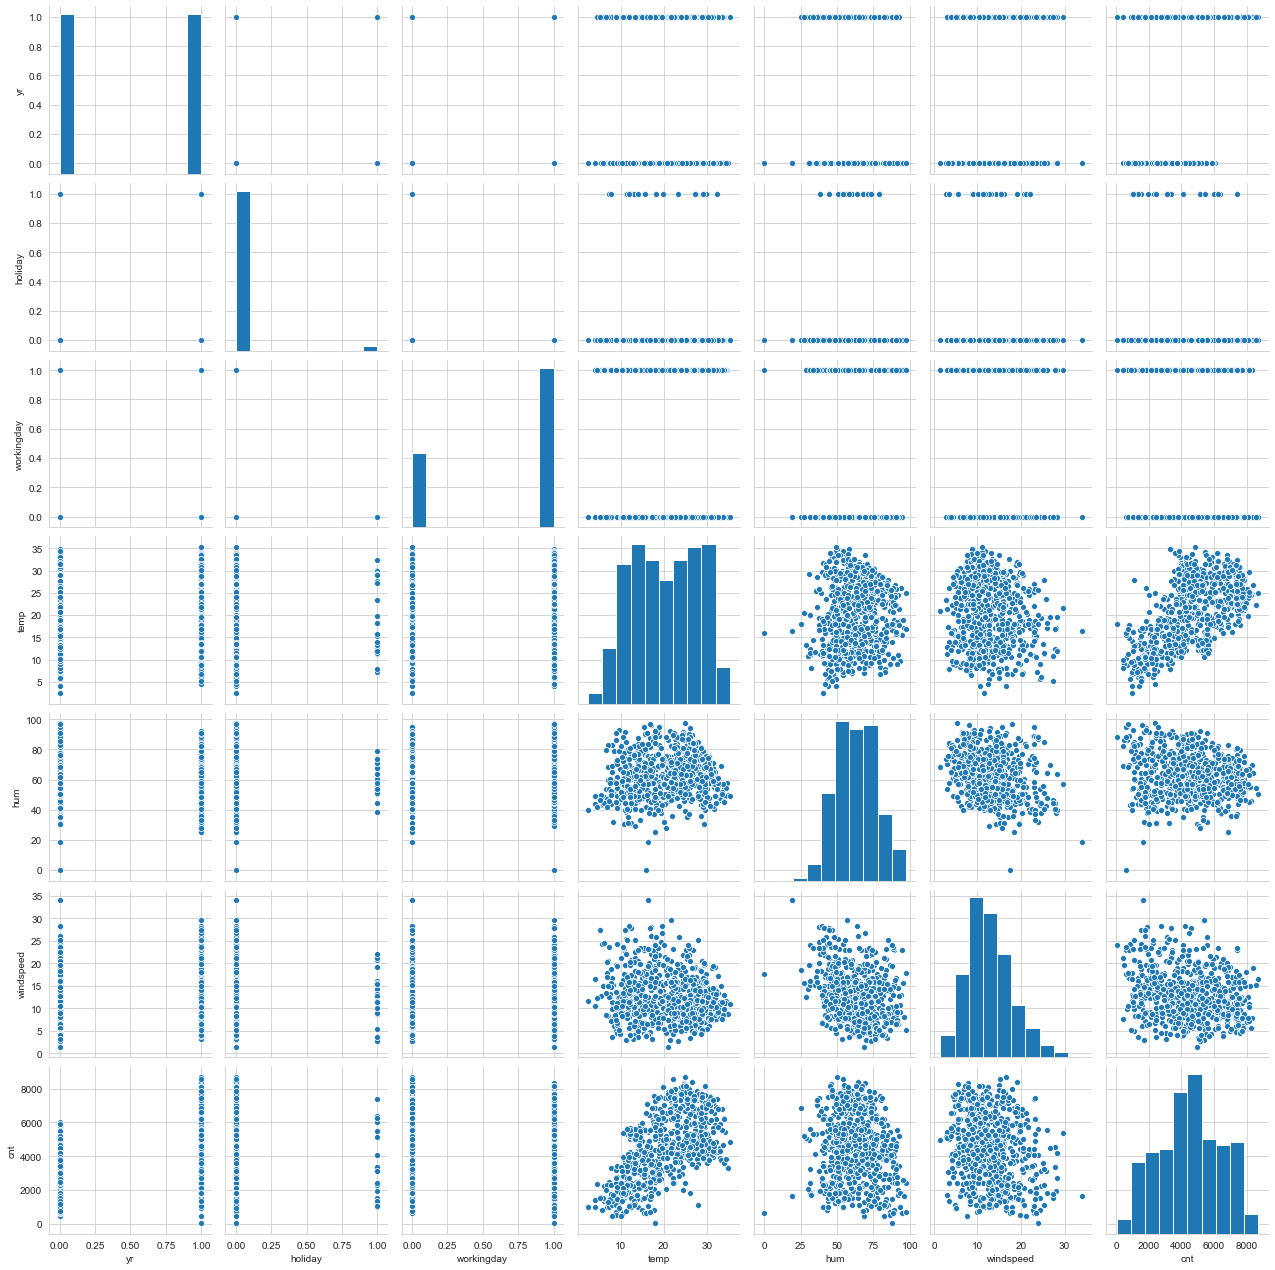

In [18]:
sns.pairplot(df)

* Temperature seems to have a positive relation with count. 


### Removing Outliers in all numeric variables 

In [19]:
df.drop(df[df['hum'] < 20].index, inplace = True)
df.drop(df[df['windspeed'] > 30].index, inplace = True)

In [20]:
df.dtypes # to create dummies, we have to convert int/float datatype to object

season         object
yr              int64
mnth           object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

### Creating Dummies for season, mnth, weekday, weathersit

In [21]:
season = pd.get_dummies(df['season'])
mnth = pd.get_dummies(df['mnth'])
weekday = pd.get_dummies(df['weekday'])
weathersit = pd.get_dummies(df['weathersit'])

In [22]:
## Dropping weathersit, season, mnth, weekday
df = df.drop(['weathersit','season', 'mnth','weekday'], axis = 1)

In [23]:
###Concat the dummy variables 

df = pd.concat([df,season, mnth, weathersit, weekday], axis = 1)
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Fall,Spring,Summer,...,Clear,Light Snow,Mist,Fri,Mon,Sat,Sun,Thur,Tue,Wed
0,0,0,0,14.110847,80.5833,10.749882,985,0,1,0,...,0,0,1,0,0,1,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,1,0,...,0,0,1,0,0,0,1,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,1,0,...,1,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,1,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,1,0,...,1,0,0,0,0,0,0,0,0,1


### Correlation between all variables 

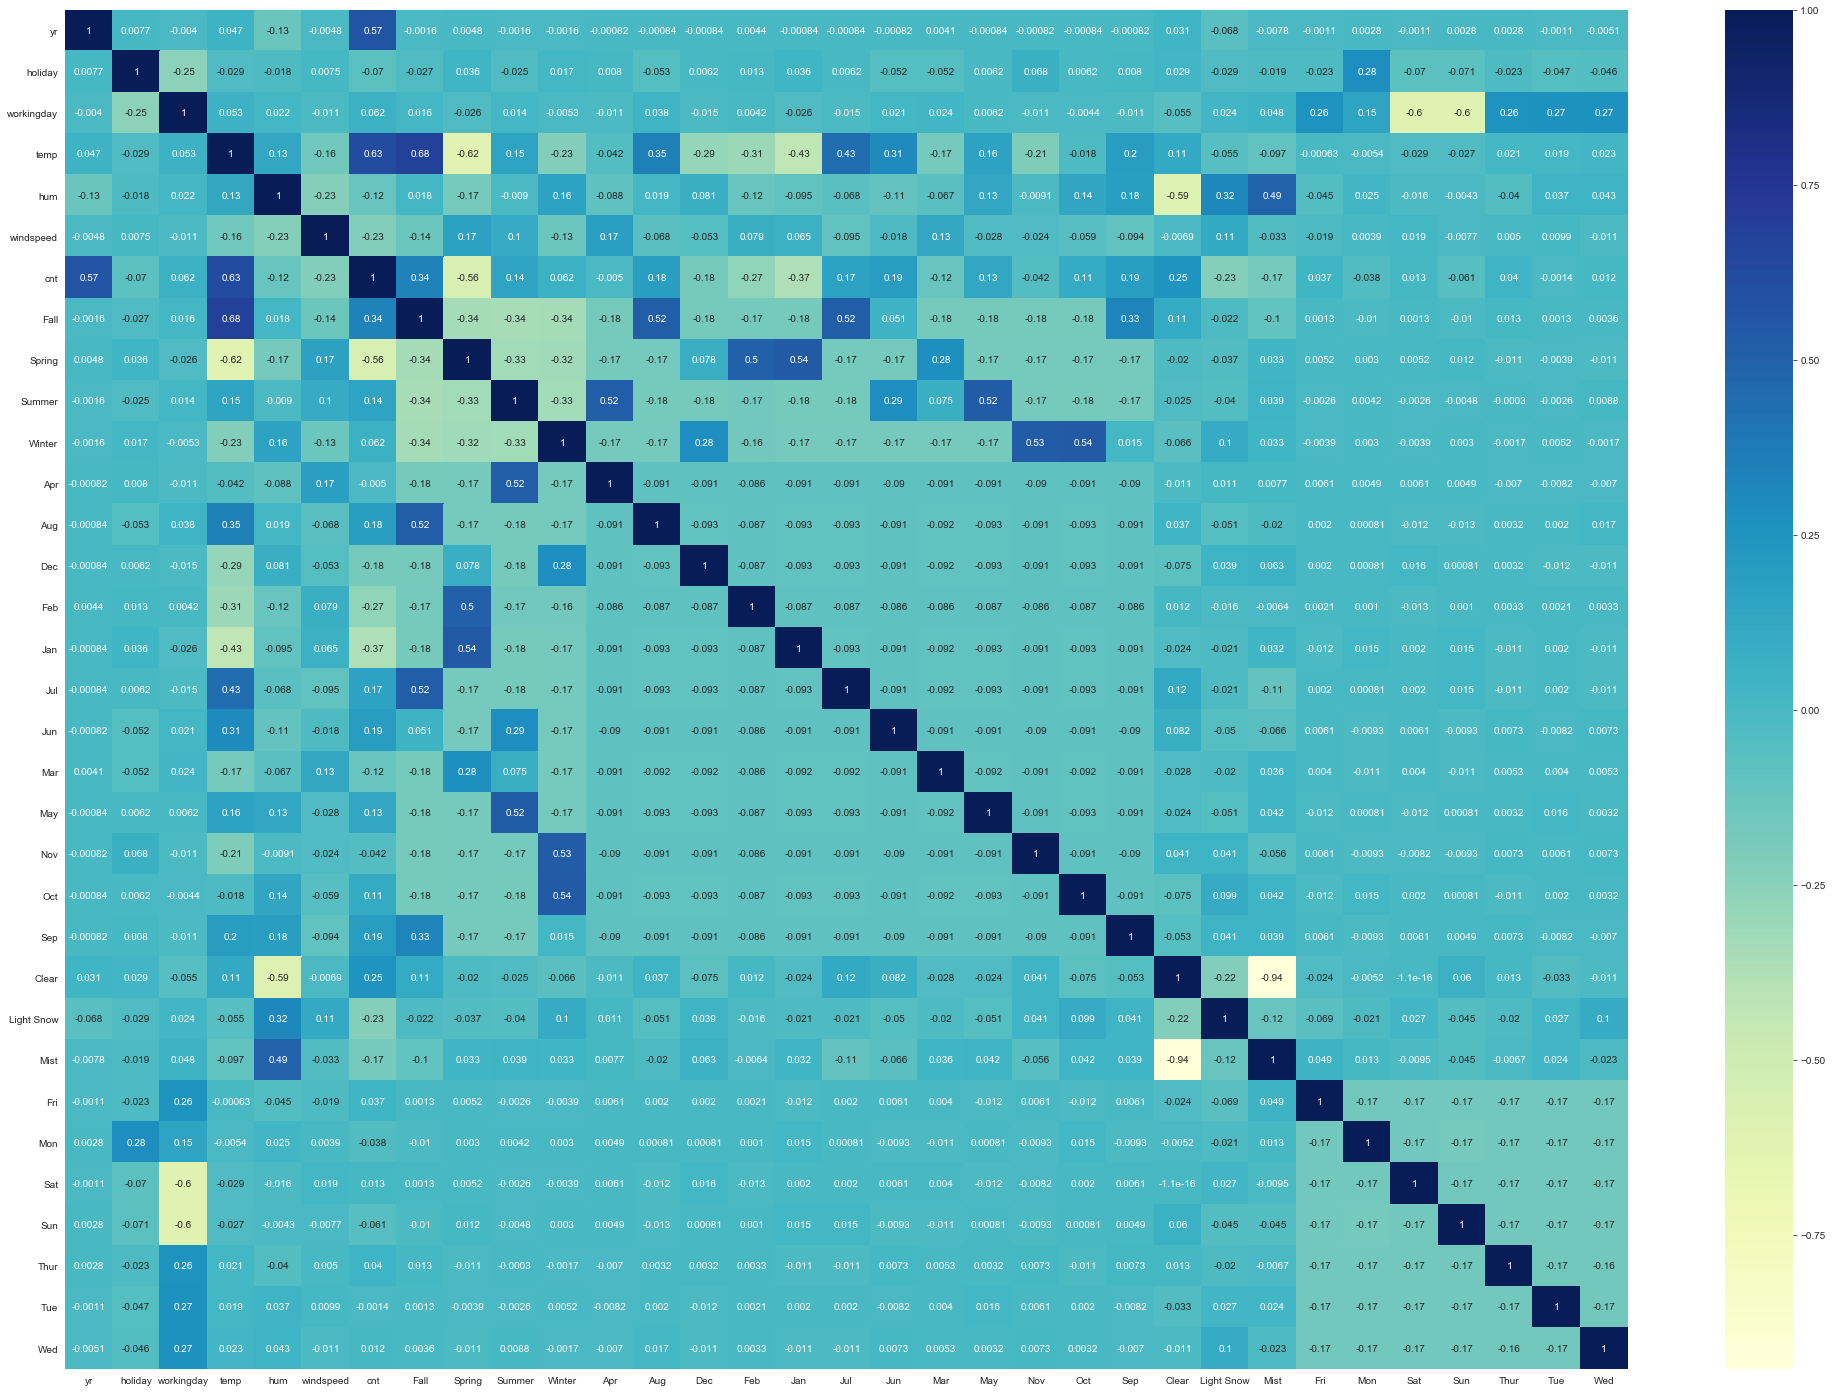

In [24]:
plt.figure(figsize = (35,25))

sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu')


Holiday, workingday, humidity, April, Friday, Monday, Saturday, Sunday, Thursday, Tuesday, Wednesday have very low correlation coefficient while year, temperature, windspeed, Spring,Feb, Jan, Clear, light Snow and Fall have high correlation coefficients. 

### Split into Train and test set 

In [25]:
df_train, df_test = train_test_split(df, train_size = 0.7, random_state= 100) 
##df_train is the train set and df_test is the test set. Size of train set is 70% of the original set. 

In [26]:
df_train.shape

(509, 33)

In [27]:
df_test.shape

(219, 33)

#### Scaling the data 

In [28]:
scaler = MinMaxScaler()
numerical = ['temp', 'hum', 'windspeed'] ### scaling the three numerical data variables using minmax scaling method


In [29]:
## fit on data 
df_train[numerical] = scaler.fit_transform(df_train[numerical])
df_train[numerical].describe()

,temp,hum,windspeed
count,509.000000,509.000000,509.000000
mean,0.537164,0.529901,0.374965
std,0.226375,0.199051,0.195571
min,0.000000,0.000000,0.000000
25%,0.336479,0.383410,0.230522
50%,0.533770,0.527262,0.353572
75%,0.736253,0.669954,0.487485
max,1.000000,1.000000,1.000000


### Training the model 

In [30]:
## Get the target variable 

y_train = df_train.pop('cnt')
X_train = df_train

In [31]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,Fall,Spring,Summer,Winter,...,Clear,Light Snow,Mist,Fri,Mon,Sat,Sun,Thur,Tue,Wed
728,1,0,0,0.245101,0.319025,0.772556,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
481,1,0,1,0.496388,0.204176,0.764739,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
113,0,0,0,0.651106,0.774941,0.375373,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
629,1,0,0,0.736253,0.546404,0.604317,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
535,1,0,1,0.901354,0.470417,0.179101,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1


In [32]:
y_train.head()

728    1796
481    6233
113    4191
629    8395
535    6211
Name: cnt, dtype: int64

### Creating first model using RFE

In [33]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE with 15 Variables
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('yr', True, 1),
 ('holiday', False, 4),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', False, 18),
 ('Fall', False, 15),
 ('Spring', True, 1),
 ('Summer', False, 11),
 ('Winter', True, 1),
 ('Apr', False, 12),
 ('Aug', False, 16),
 ('Dec', False, 3),
 ('Feb', False, 17),
 ('Jan', False, 6),
 ('Jul', True, 1),
 ('Jun', False, 7),
 ('Mar', True, 1),
 ('May', True, 1),
 ('Nov', True, 1),
 ('Oct', False, 9),
 ('Sep', True, 1),
 ('Clear', True, 1),
 ('Light Snow', True, 1),
 ('Mist', True, 1),
 ('Fri', False, 10),
 ('Mon', False, 2),
 ('Sat', True, 1),
 ('Sun', False, 5),
 ('Thur', False, 14),
 ('Tue', False, 8),
 ('Wed', False, 13)]

In [34]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'workingday', 'temp', 'hum', 'Spring', 'Winter', 'Jul', 'Mar',
       'May', 'Nov', 'Sep', 'Clear', 'Light Snow', 'Mist', 'Sat'],
      dtype='object')

In [35]:
X_train.columns[~rfe.support_]

Index(['holiday', 'windspeed', 'Fall', 'Summer', 'Apr', 'Aug', 'Dec', 'Feb',
       'Jan', 'Jun', 'Oct', 'Fri', 'Mon', 'Sun', 'Thur', 'Tue', 'Wed'],
      dtype='object')

### Building Model 1 using RFE

In [36]:
# Creating X_test dataframe with RFE selected variables
X_train1 = X_train[col]

In [37]:
X_train1 = sm.add_constant(X_train1)

In [38]:
lm1 = sm.OLS(y_train,X_train1).fit()   # Running the linear model

In [39]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     186.6
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          7.46e-187
Time:                        22:57:30   Log-Likelihood:                -4109.4
No. Observations:                 509   AIC:                             8249.
Df Residuals:                     494   BIC:                             8312.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        532.5021    180.821      2.945      0.003     177.229     887.775
yr          1966.2632     71.725     27.414      0.000    1825.339    2107.187
workingday   381.5716     94.078      4.056      0.000     196.730     566.414
temp        4210.1560    272.778     15.434      0.000    3674.208    4746.104
hum         -891.3845    250.060     -3.565      0.000   -1382.696    -400.073
Spring     -1031.3197    136.746     -7.542      0.000   -1299.995    -762.645
Winter       667.9187    121.099      5.515      0.000     429.986     905.851
Jul         -444.1861    153.590     -2.892      0.004    -745.956    -142.416
Mar          403.6475    134.882      2.993      0.003     138.634     668.661
May          345.0524    138.331      2.494      0.013      73.263     616.842
Nov         -277.6981    147.995     -1.876      0.061    -568.476      13.079
Sep          726.8513    138.315      5.255      0.000     455.094     998.609
Clear       1103.2495     84.706     13.025      0.000     936.822    1269.677
Light Snow -1160.9591    180.645     -6.427      0.000   -1515.886    -806.032
Mist         590.2116     88.838      6.644      0.000     415.664     764.759
Sat          477.1806    124.517      3.832      0.000     232.533     721.828
==============================================================================
Omnibus:                       98.544   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              326.663
Skew:                          -0.877   Prob(JB):                     1.16e-71
Kurtosis:                       6.511   Cond. No.                     2.45e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.57e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Checking for multicollinearity. 

In [40]:
vif = pd.DataFrame()
vif['Features'] = X_train1.columns
vif['VIF'] = [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Clear,inf
13,Light Snow,inf
14,Mist,inf
3,temp,3.12
5,Spring,2.81
6,Winter,2.27
4,hum,2.03
2,workingday,1.58
15,Sat,1.56
10,Nov,1.48


November has a p-value of 0.061 making it statistically insignificant.

### Model 2 : Dropping Nov 

In [41]:
X_train2 = X_train1.drop(["Nov"], axis = 1) 

In [42]:
lm2 = sm.OLS(y_train,X_train2).fit()   # Running the linear model

In [43]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     199.6
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.97e-187
Time:                        22:57:30   Log-Likelihood:                -4111.2
No. Observations:                 509   AIC:                             8250.
Df Residuals:                     495   BIC:                             8310.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        495.6102    180.206      2.750      0.006     141.547     849.673
yr          1963.7316     71.895     27.314      0.000    1822.475    2104.988
workingday   375.5815     94.263      3.984      0.000     190.377     560.786
temp        4281.6942    270.787     15.812      0.000    3749.660    4813.728
hum         -875.9278    250.560     -3.496      0.001   -1368.219    -383.636
Spring     -1001.7124    136.178     -7.356      0.000   -1269.270    -734.154
Winter       584.8598    113.006      5.175      0.000     362.830     806.890
Jul         -453.1373    153.906     -2.944      0.003    -755.527    -150.747
Mar          406.8538    135.214      3.009      0.003     141.189     672.519
May          345.6423    138.683      2.492      0.013      73.163     618.121
Sep          743.6541    138.375      5.374      0.000     471.778    1015.530
Clear       1084.6855     84.340     12.861      0.000     918.977    1250.393
Light Snow -1169.6282    181.045     -6.460      0.000   -1525.339    -813.917
Mist         580.5529     88.915      6.529      0.000     405.856     755.250
Sat          466.6857    124.707      3.742      0.000     221.665     711.706
==============================================================================
Omnibus:                       96.411   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              310.222
Skew:                          -0.868   Prob(JB):                     4.33e-68
Kurtosis:                       6.408   Cond. No.                     2.30e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.92e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Check VIF

In [44]:
vif = pd.DataFrame()
vif['Features'] = X_train2.columns
vif['VIF'] = [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Clear,inf
12,Light Snow,inf
13,Mist,inf
3,temp,3.06
5,Spring,2.77
4,hum,2.02
6,Winter,1.97
2,workingday,1.58
14,Sat,1.56
7,Jul,1.37


- R-square has reduced but adjusted R-square remains the same. 
- Mist, clear and light snow are highly correlated as they are dummies of the same parameters. They can be removed. 
    
Let's start with Mist

### Model 3 : Dropping Mist

In [45]:
X_train3 = X_train2.drop('Mist',axis = 1)

In [46]:
lm3 = sm.OLS(y_train,X_train3).fit()   # Running the linear model

In [47]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     199.6
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.97e-187
Time:                        22:57:30   Log-Likelihood:                -4111.2
No. Observations:                 509   AIC:                             8250.
Df Residuals:                     495   BIC:                             8310.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1076.1631    236.928      4.542      0.000     610.655    1541.671
yr          1963.7316     71.895     27.314      0.000    1822.475    2104.988
workingday   375.5815     94.263      3.984      0.000     190.377     560.786
temp        4281.6942    270.787     15.812      0.000    3749.660    4813.728
hum         -875.9278    250.560     -3.496      0.001   -1368.219    -383.636
Spring     -1001.7124    136.178     -7.356      0.000   -1269.270    -734.154
Winter       584.8598    113.006      5.175      0.000     362.830     806.890
Jul         -453.1373    153.906     -2.944      0.003    -755.527    -150.747
Mar          406.8538    135.214      3.009      0.003     141.189     672.519
May          345.6423    138.683      2.492      0.013      73.163     618.121
Sep          743.6541    138.375      5.374      0.000     471.778    1015.530
Clear        504.1326     93.699      5.380      0.000     320.036     688.229
Light Snow -1750.1811    216.748     -8.075      0.000   -2176.040   -1324.322
Sat          466.6857    124.707      3.742      0.000     221.665     711.706
==============================================================================
Omnibus:                       96.411   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              310.222
Skew:                          -0.868   Prob(JB):                     4.33e-68
Kurtosis:                       6.408   Cond. No.                         16.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
vif = pd.DataFrame()
vif['Features'] = X_train3.columns
vif['VIF'] = [variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,45.78
3,temp,3.06
5,Spring,2.77
4,hum,2.02
6,Winter,1.97
11,Clear,1.70
2,workingday,1.58
13,Sat,1.56
7,Jul,1.37
9,May,1.26


- R-square and Adjusted R-square remain same as Model 2 but VIFs have changed. No very large VIFs spotted.
- May has considerably high p-value. Drop it in next step. 

### Model 4 : Dropping May

In [49]:
X_train4 = X_train3.drop('May', axis =1)

In [50]:
lm4 = sm.OLS(y_train, X_train4).fit()

In [51]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     213.5
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          4.30e-187
Time:                        22:57:30   Log-Likelihood:                -4114.4
No. Observations:                 509   AIC:                             8255.
Df Residuals:                     496   BIC:                             8310.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1105.5024    237.875      4.647      0.000     638.136    1572.869
yr          1957.7597     72.231     27.104      0.000    1815.842    2099.677
workingday   380.8917     94.733      4.021      0.000     194.765     567.018
temp        4264.0652    272.113     15.670      0.000    3729.429    4798.702
hum         -759.6887    247.471     -3.070      0.002   -1245.909    -273.469
Spring     -1077.5905    133.427     -8.076      0.000   -1339.741    -815.439
Winter       499.2399    108.222      4.613      0.000     286.611     711.869
Jul         -526.5465    151.853     -3.467      0.001    -824.901    -228.192
Mar          372.6776    135.222      2.756      0.006     106.999     638.357
Sep          669.4181    135.840      4.928      0.000     402.526     936.310
Clear        513.3886     94.116      5.455      0.000     328.474     698.303
Light Snow -1802.7860    216.848     -8.314      0.000   -2228.840   -1376.732
Sat          459.6178    125.328      3.667      0.000     213.378     705.857
==============================================================================
Omnibus:                       91.522   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              278.595
Skew:                          -0.841   Prob(JB):                     3.19e-61
Kurtosis:                       6.210   Cond. No.                         16.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### VIF

In [52]:
vif = pd.DataFrame()
vif['Features'] = X_train4.columns
vif['VIF'] = [variance_inflation_factor(X_train4.values, i) for i in range(X_train4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,45.67
3,temp,3.06
5,Spring,2.63
4,hum,1.95
6,Winter,1.79
10,Clear,1.70
2,workingday,1.58
12,Sat,1.56
7,Jul,1.32
11,Light Snow,1.16


- R-square and Adjusted R-square value have reduced by 0.002. 

### Model 5 : Adding Fall

Fall had a high correlation coefficient of 0.34 with CNT. Let's try adding it and see how the model changes. 

In [53]:
X_train5 = pd.concat([X_train4,X_train['Fall']], axis =1)

In [54]:
lm5 = sm.OLS(y_train, X_train5).fit()

In [55]:
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     198.6
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          8.84e-187
Time:                        22:57:30   Log-Likelihood:                -4112.3
No. Observations:                 509   AIC:                             8253.
Df Residuals:                     495   BIC:                             8312.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1074.3499    237.671      4.520      0.000     607.382    1541.318
yr          1952.3921     72.064     27.092      0.000    1810.803    2093.981
workingday   380.9640     94.448      4.034      0.000     195.396     566.532
temp        4496.5941    295.174     15.234      0.000    3916.645    5076.543
hum         -805.1914    247.774     -3.250      0.001   -1292.009    -318.373
Spring     -1083.0140    133.053     -8.140      0.000   -1344.432    -821.596
Winter       445.3163    111.216      4.004      0.000     226.802     663.830
Jul         -408.9012    162.430     -2.517      0.012    -728.038     -89.764
Mar          339.2095    135.851      2.497      0.013      72.294     606.125
Sep          788.0312    147.856      5.330      0.000     497.528    1078.534
Clear        510.3863     93.845      5.439      0.000     326.003     694.769
Light Snow -1780.5479    216.482     -8.225      0.000   -2205.885   -1355.211
Sat          471.1291    125.084      3.767      0.000     225.368     716.890
Fall        -263.4520    131.773     -1.999      0.046    -522.356      -4.548
==============================================================================
Omnibus:                       93.402   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              280.832
Skew:                          -0.863   Prob(JB):                     1.04e-61
Kurtosis:                       6.204   Cond. No.                         17.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### VIF 

In [56]:
vif = pd.DataFrame()
vif['Features'] = X_train5.columns
vif['VIF'] = [variance_inflation_factor(X_train5.values, i) for i in range(X_train5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,45.87
3,temp,3.62
13,Fall,2.71
5,Spring,2.63
4,hum,1.97
6,Winter,1.90
10,Clear,1.70
2,workingday,1.58
12,Sat,1.56
7,Jul,1.52


- Both R-square and Adjusted R-square have increased from last model. 
- Only Temp VIF is above 3. 

### Model 6 : Dropping Mar

In [57]:
X_train6 = X_train5.drop('Mar', axis = 1)

In [58]:
lm6 = sm.OLS(y_train, X_train6).fit()

In [59]:
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.30e-186
Time:                        22:57:31   Log-Likelihood:                -4115.5
No. Observations:                 509   AIC:                             8257.
Df Residuals:                     496   BIC:                             8312.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1129.3402    237.894      4.747      0.000     661.937    1596.744
yr          1946.4423     72.404     26.883      0.000    1804.186    2088.698
workingday   391.8840     94.843      4.132      0.000     205.541     578.227
temp        4503.8905    296.713     15.179      0.000    3920.920    5086.861
hum         -835.1645    248.785     -3.357      0.001   -1323.968    -346.361
Spring     -1048.9499    133.048     -7.884      0.000   -1310.358    -787.542
Winter       406.0009    110.675      3.668      0.000     188.551     623.451
Jul         -409.6626    163.284     -2.509      0.012    -730.477     -88.848
Sep          788.7265    148.634      5.307      0.000     496.697    1080.756
Clear        494.6117     94.125      5.255      0.000     309.680     679.544
Light Snow -1769.7488    217.578     -8.134      0.000   -2197.237   -1342.261
Sat          485.5805    125.607      3.866      0.000     238.792     732.369
Fall        -303.9961    131.457     -2.313      0.021    -562.278     -45.714
==============================================================================
Omnibus:                       90.495   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              293.182
Skew:                          -0.811   Prob(JB):                     2.17e-64
Kurtosis:                       6.346   Cond. No.                         17.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
vif = pd.DataFrame()
vif['Features'] = X_train6.columns
vif['VIF'] = [variance_inflation_factor(X_train6.values, i) for i in range(X_train6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,45.47
3,temp,3.62
12,Fall,2.67
5,Spring,2.61
4,hum,1.97
6,Winter,1.86
9,Clear,1.70
2,workingday,1.57
11,Sat,1.56
7,Jul,1.52


- R-square and Adjusted R-square have reduced again. 
- VIF of Temperature has also reduced. 
Keeping fall and dropping Jul to see if there are any changes in Fall p-values and VIF. 

### Model 7 : Dropping Jul

In [61]:
X_train7 = X_train6.drop('Jul', axis = 1)

In [62]:
lm7 = sm.OLS(y_train, X_train7).fit()

In [63]:
lm7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.6
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.89e-186
Time:                        22:57:31   Log-Likelihood:                -4118.7
No. Observations:                 509   AIC:                             8261.
Df Residuals:                     497   BIC:                             8312.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1152.6744    238.975      4.823      0.000     683.149    1622.200
yr          1956.2953     72.681     26.916      0.000    1813.495    2099.096
workingday   407.2556     95.148      4.280      0.000     220.315     594.197
temp        4369.4993    293.389     14.893      0.000    3793.064    4945.934
hum         -772.8775    248.859     -3.106      0.002   -1261.822    -283.933
Spring     -1084.9355    132.976     -8.159      0.000   -1346.199    -823.672
Winter       377.7050    110.684      3.412      0.001     160.239     595.171
Sep          897.7563    142.894      6.283      0.000     617.005    1178.507
Clear        507.0533     94.493      5.366      0.000     321.398     692.709
Light Snow -1796.3902    218.473     -8.222      0.000   -2225.635   -1367.146
Sat          489.8071    126.263      3.879      0.000     241.731     737.883
Fall        -424.4725    123.023     -3.450      0.001    -666.182    -182.763
==============================================================================
Omnibus:                       92.876   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              288.408
Skew:                          -0.847   Prob(JB):                     2.36e-63
Kurtosis:                       6.276   Cond. No.                         17.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Fall p-value has reduced making it statistically significant variable. 

In [64]:
vif = pd.DataFrame()
vif['Features'] = X_train7.columns
vif['VIF'] = [variance_inflation_factor(X_train7.values, i) for i in range(X_train7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,45.40
3,temp,3.50
5,Spring,2.58
11,Fall,2.31
4,hum,1.95
6,Winter,1.84
8,Clear,1.69
2,workingday,1.57
10,Sat,1.56
7,Sep,1.20


- R-square and adjusted R-square have dropped. 
- VIFs have also slightly dropped. 

### Model 8 :Removing working day

working day had a low correlation coefficient. Let's see if removing it brings about any change in model. 

In [65]:
X_train8 = X_train7.drop('workingday', axis =1)

In [66]:
lm8 = sm.OLS(y_train, X_train8).fit()
lm8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     241.3
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          9.25e-184
Time:                        22:57:31   Log-Likelihood:                -4127.9
No. Observations:                 509   AIC:                             8278.
Df Residuals:                     498   BIC:                             8324.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1489.7940    229.513      6.491      0.000    1038.862    1940.726
yr          1950.9733     73.924     26.392      0.000    1805.733    2096.214
temp        4424.7248    298.158     14.840      0.000    3838.921    5010.528
hum         -818.1449    252.921     -3.235      0.001   -1315.068    -321.222
Spring     -1085.0555    135.268     -8.022      0.000   -1350.822    -819.289
Winter       385.3868    112.578      3.423      0.001     164.201     606.573
Sep          891.4683    145.350      6.133      0.000     605.893    1177.043
Clear        480.9396     95.922      5.014      0.000     292.478     669.401
Light Snow -1747.9681    221.942     -7.876      0.000   -2184.025   -1311.911
Sat          168.8375    103.335      1.634      0.103     -34.188     371.864
Fall        -440.8924    125.083     -3.525      0.000    -686.648    -195.137
==============================================================================
Omnibus:                       95.908   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              259.200
Skew:                          -0.922   Prob(JB):                     5.19e-57
Kurtosis:                       5.970   Cond. No.                         15.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
vif = pd.DataFrame()
vif['Features'] = X_train8.columns
vif['VIF'] = [variance_inflation_factor(X_train8.values, i) for i in range(X_train8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,40.47
2,temp,3.49
4,Spring,2.58
10,Fall,2.31
3,hum,1.94
5,Winter,1.84
7,Clear,1.68
6,Sep,1.20
8,Light Snow,1.15
1,yr,1.05


- Saturday has high p-values making it statistically insignificant. Let's drop it to see the changes in the model. 
- R-square and adjusted R-square have dropped significantly 

### Model 9 : Dropping Sat

In [68]:
X_train9 = X_train8.drop('Sat', axis = 1)
lm9 = sm.OLS(y_train, X_train9).fit()
lm9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     266.9
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.07e-184
Time:                        22:57:31   Log-Likelihood:                -4129.3
No. Observations:                 509   AIC:                             8279.
Df Residuals:                     499   BIC:                             8321.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1523.8136    228.948      6.656      0.000    1073.992    1973.635
yr          1949.6243     74.043     26.331      0.000    1804.151    2095.098
temp        4389.6773    297.883     14.736      0.000    3804.418    4974.936
hum         -806.9343    253.250     -3.186      0.002   -1304.502    -309.366
Spring     -1089.2194    135.470     -8.040      0.000   -1355.382    -823.057
Winter       383.6848    112.761      3.403      0.001     162.140     605.230
Sep          887.6208    145.574      6.097      0.000     601.607    1173.634
Clear        484.1554     96.062      5.040      0.000     295.420     672.891
Light Snow -1754.3667    222.278     -7.893      0.000   -2191.083   -1317.651
Fall        -426.4154    124.978     -3.412      0.001    -671.963    -180.868
==============================================================================
Omnibus:                       89.054   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              245.227
Skew:                          -0.852   Prob(JB):                     5.62e-54
Kurtosis:                       5.943   Cond. No.                         15.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
vif = pd.DataFrame()
vif['Features'] = X_train9.columns
vif['VIF'] = [variance_inflation_factor(X_train9.values, i) for i in range(X_train9.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,40.14
2,temp,3.48
4,Spring,2.58
9,Fall,2.30
3,hum,1.94
5,Winter,1.84
7,Clear,1.68
6,Sep,1.20
8,Light Snow,1.15
1,yr,1.05


- R-square and Adjusted R-square have dropped again. 
- There is no significant change in VIFs either

### Model 10 : Adding windspeed 

Let's check if the addition of another numerical variable with high correlation coefficient brings about favourable changes in the model. 

In [70]:
X_train10 = pd.concat([X_train9, X_train['windspeed']], axis = 1)
lm10 = sm.OLS(y_train, X_train10).fit()
lm10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     259.1
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          3.61e-190
Time:                        22:57:31   Log-Likelihood:                -4112.8
No. Observations:                 509   AIC:                             8248.
Df Residuals:                     498   BIC:                             8294.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2239.3019    254.132      8.812      0.000    1739.999    2738.604
yr          1935.6147     71.795     26.960      0.000    1794.556    2076.673
temp        4453.7831    288.889     15.417      0.000    3886.191    5021.375
hum        -1241.2952    256.694     -4.836      0.000   -1745.631    -736.959
Spring     -1067.9105    131.335     -8.131      0.000   -1325.950    -809.871
Winter       312.1698    109.975      2.839      0.005      96.097     528.243
Sep          871.5146    141.102      6.176      0.000     594.286    1148.744
Clear        392.6796     94.431      4.158      0.000     207.147     578.213
Light Snow -1500.9280    219.835     -6.828      0.000   -1932.846   -1069.010
Fall        -530.1044    122.439     -4.330      0.000    -770.665    -289.544
windspeed  -1130.0951    195.726     -5.774      0.000   -1514.646    -745.544
==============================================================================
Omnibus:                       91.516   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              245.532
Skew:                          -0.884   Prob(JB):                     4.82e-54
Kurtosis:                       5.908   Cond. No.                         16.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
vif = pd.DataFrame()
vif['Features'] = X_train10.columns
vif['VIF'] = [variance_inflation_factor(X_train10.values, i) for i in range(X_train10.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,52.66
2,temp,3.48
4,Spring,2.58
9,Fall,2.35
3,hum,2.12
5,Winter,1.87
7,Clear,1.73
6,Sep,1.20
8,Light Snow,1.20
10,windspeed,1.19


- R-square has increased considerably from 0.828 to 0.839 and adjusted R-square has increased from 0.825 to 0.836. 
- VIFs have not changed significantly. 

Let's drop winter as it has a comparatively high p-value

### Model 11 : Dropping winter

In [72]:
X_train11 = X_train10.drop('Winter', axis =1)
lm11 = sm.OLS(y_train, X_train11).fit()
lm11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     283.0
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.12e-189
Time:                        22:57:31   Log-Likelihood:                -4116.9
No. Observations:                 509   AIC:                             8254.
Df Residuals:                     499   BIC:                             8296.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2506.4463    237.726     10.543      0.000    2039.379    2973.514
yr          1947.1892     72.184     26.975      0.000    1805.367    2089.012
temp        4141.1931    268.958     15.397      0.000    3612.762    4669.624
hum        -1148.9023    256.416     -4.481      0.000   -1652.690    -645.114
Spring     -1283.3642    107.936    -11.890      0.000   -1495.428   -1071.300
Sep          884.5574    142.021      6.228      0.000     605.524    1163.591
Clear        422.1891     94.519      4.467      0.000     236.485     607.893
Light Snow -1451.0649    220.676     -6.576      0.000   -1884.633   -1017.497
Fall        -607.2496    120.226     -5.051      0.000    -843.461    -371.038
windspeed  -1192.6669    195.851     -6.090      0.000   -1577.462    -807.872
==============================================================================
Omnibus:                       81.220   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.630
Skew:                          -0.817   Prob(JB):                     4.48e-44
Kurtosis:                       5.597   Cond. No.                         15.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
vif = pd.DataFrame()
vif['Features'] = X_train11.columns
vif['VIF'] = [variance_inflation_factor(X_train11.values, i) for i in range(X_train11.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,45.44
2,temp,2.97
8,Fall,2.23
3,hum,2.09
4,Spring,1.72
6,Clear,1.71
5,Sep,1.20
7,Light Snow,1.19
9,windspeed,1.18
1,yr,1.05


* R-square is 0.836 and Adjusted R-square is 0.833. 
* VIFs of all parameters are withing 3 except for constant. 
* There are 9 parameters and 1 constant and none have a p-value signifying that they are statistically significant. 

This model seems acceptable. 



*cnt = (2506.44)const + (1947.18) yr + (4141.19) temp + (- 1148.90) hum + (- 1283.36) Spring + (884.55) Sep + (422.18) Clear + (-1451.06)Light Snow + (-607) Fall + (-1192.669) Windspeed*

### Residual Analysis of the train data

In [74]:
y_train_cnt = lm11.predict(X_train11)

Text(0.5, 0, 'Errors')

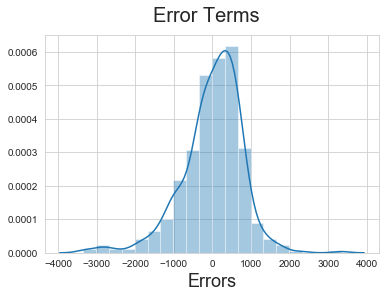

In [75]:
# Plot the histogram of the error terms
fig = plt.figure()
Res = y_train - y_train_cnt
sns.distplot( Res , bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Error terms are normally distributed with their mean as zero. 

In [76]:
Res.mean()

-5.217086749511802e-12

Error terms have a mean of zero as visually evident from the plot and from the function above. 

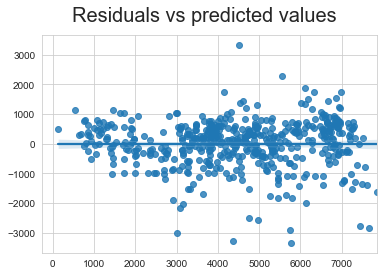

In [78]:
## Checking if the residuals are dependent 
fig = plt.figure()
fig.suptitle('Residuals vs predicted values', fontsize = 20)  
sns.regplot(y_train_cnt,Res)
plt.show()

Residual errors are independent of each other. 

**Three assumptions of residuals checked.**

* Residuals are normally distributed. 
* Residuals have a mean of zero. 
* They are independent of each other.  

### Making predictions using final model 

In [79]:
numerical = ['temp', 'hum', 'windspeed'] ### scaling the numerical variables

In [80]:
df_test[numerical] = scaler.transform(df_test[numerical])

In [81]:
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Fall,Spring,Summer,...,Clear,Light Snow,Mist,Fri,Mon,Sat,Sun,Thur,Tue,Wed
241,0,0,1,0.722754,0.409512,0.207143,5204,1,0,0,...,1,0,0,0,0,0,0,0,1,0
496,1,0,0,0.629300,0.314965,0.202447,7429,0,0,1,...,1,0,0,0,0,1,0,0,0,0
449,1,0,1,0.481850,0.311485,0.862891,5558,0,0,1,...,1,0,0,0,1,0,0,0,0,0
594,1,0,0,0.771557,0.486078,0.339536,7865,1,0,0,...,1,0,0,0,0,1,0,0,0,0
151,0,0,1,0.878510,0.588746,0.412734,3974,0,0,1,...,0,0,1,0,0,0,0,0,0,1


#### Dividing into Target and predictor variable 

In [82]:
y_test = df_test.pop('cnt')
X_test = df_test

In [83]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

In [84]:
X_test.head()

,const,yr,holiday,workingday,temp,hum,windspeed,Fall,Spring,Summer,...,Clear,Light Snow,Mist,Fri,Mon,Sat,Sun,Thur,Tue,Wed
241,1.0,0,0,1,0.722754,0.409512,0.207143,1,0,0,...,1,0,0,0,0,0,0,0,1,0
496,1.0,1,0,0,0.629300,0.314965,0.202447,0,0,1,...,1,0,0,0,0,1,0,0,0,0
449,1.0,1,0,1,0.481850,0.311485,0.862891,0,0,1,...,1,0,0,0,1,0,0,0,0,0
594,1.0,1,0,0,0.771557,0.486078,0.339536,1,0,0,...,1,0,0,0,0,1,0,0,0,0
151,1.0,0,0,1,0.878510,0.588746,0.412734,0,0,1,...,0,0,1,0,0,0,0,0,0,1


In [85]:
X_test1 = X_test[X_train11.columns] ##taking the same columns as the final model

### Model Evaluation 

In [86]:
y_pred = lm11.predict(X_test1)

Text(0, 0.5, 'y_pred')

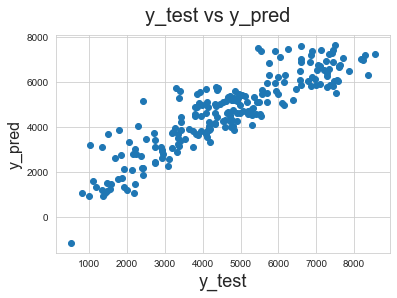

In [87]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)

fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Y_test values and Y predicted values almost seem to overlap each other pointing that the final model indeed predicts values with minimal errors. 

In [88]:
lm_test = sm.OLS(y_test, X_test1).fit()

In [89]:
lm_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     93.05
Date:                Mon, 27 Jul 2020   Prob (F-statistic):           3.93e-68
Time:                        23:00:30   Log-Likelihood:                -1785.9
No. Observations:                 219   AIC:                             3592.
Df Residuals:                     209   BIC:                             3626.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2849.9526    417.127      6.832      0.000    2027.638    3672.267
yr          2143.1307    118.413     18.099      0.000    1909.694    2376.567
temp        3425.8781    427.569      8.012      0.000    2582.977    4268.780
hum        -1028.7814    454.194     -2.265      0.025   -1924.171    -133.392
Spring     -1524.7692    178.402     -8.547      0.000   -1876.468   -1173.071
Sep          633.4838    223.272      2.837      0.005     193.330    1073.637
Clear        398.0673    162.492      2.450      0.015      77.733     718.401
Light Snow -1024.6594    471.326     -2.174      0.031   -1953.822     -95.497
Fall        -586.2742    188.172     -3.116      0.002    -957.232    -215.317
windspeed  -1308.3685    346.753     -3.773      0.000   -1991.950    -624.787
==============================================================================
Omnibus:                       18.844   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.588
Skew:                          -0.672   Prob(JB):                     2.05e-05
Kurtosis:                       3.749   Cond. No.                         17.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred) 

0.7902751010274356

R2 score is around 0.80 indicating that the model is a close fit. 

#### Summary

   * Train R-square - 0.836
   * Train Adjusted R-square - 0.833
   * Test R-square - 0.800
   * Test Adjusted R-Square - 0.79

#### Quick walk through how the model was derived and the corresponding R2 and adjusted R2 values. 

- Model 1 using RFE - 0.841/0.836
- Model 2 dropping November - 0.840/0.836
- Model 3 dropping Mist - 0.840/0.836
- Model 4 dropping May - 0.838/0.834
- Model 5 adding Fall - 0.839/0.835
- Model 6 dropping March - 0.837/0.833
- Model 7 dropping July - 0.835/0.831
- Model 8 dropping working day - 0.829/0.825
- Model 9 dropping Saturday - 0.828/0.825
- Model 10 adding windspeed - 0.839/0.836
- Model 11 dropping winter - 0.836/0.833

**Final Model**

**cnt = (2506.44)const + (1947.18) yr + (4141.19) temp + (- 1148.90) hum + (- 1283.36) Spring + (884.55) Sep + (422.18) Clear + 
(-1451.06)Light Snow + (-607) Fall + (-1192.669) Windspeed**

**Model Features**
* Year
* Temperature
* Humidity
* Spring 
* September
* Clear
* Light Snow 
* Fall 
* Windspeed

#### Recommendations to the company:

   * Year has a high beta coefficient. The rentals are likely to increase with each year. 
   * Temperature also has a high beta coefficient. Days with high/moderate temperatures are favourable for rentals. It is advised to keep the operations in full swing on such days. 
   * On days of high humidity and high windspeed, rental count is likely to be low. 
   * September month seems to favour rentals. Hence operations like marketing and higher budget may be allocated for the month of September. 
   * Seasons like Light snow, fall and spring are likely to attract less rentals while clear sky needless to say will attract more rentals. 